In [91]:
# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# data analysis libraries
import pandas as pd
import numpy as np

# general imports
from pathlib import Path

### Load the data from the experiments

In [92]:
folder = Path("storage/testing_data/")

# load all csv files in the folder using pandas
df = pd.concat([pd.read_csv(f) for f in folder.glob("*.csv")])
df["stride_series"].replace(np.NaN, False, inplace=True)
df['train_exc_limit'].replace(np.NaN, 0, inplace=True)
df["pretrained"].replace(np.NaN, False, inplace=True)
df["cv_rep"].replace(np.NaN, False, inplace=True)
df["eq_wdw_length"] = df["window_length"]*df["window_time_stride"]
df

,mode,arch,dataset,val_size,max_epochs,batch_size,pretrain_mode,window_length,window_time_stride,window_patt_stride,...,nevents_test,nevents_train_lim,nevents_train_tot,time_dm,time_train,time_total,stride_series,val_mse,val_r2,eq_wdw_length
0,ts,tcn,CBF,0.25,20,128,False,10,1,1,...,200.0,384.0,384.0,4.525239,130.048233,134.573473,False,NaN,NaN,10
1,ts,tcn,CBF,0.25,20,128,False,30,1,1,...,200.0,384.0,384.0,4.737148,143.013292,147.750440,False,NaN,NaN,30
2,ts,tcn,CBF,0.25,20,128,False,50,1,1,...,200.0,384.0,384.0,4.412466,154.461417,158.873883,False,NaN,NaN,50
3,ts,tcn,CBF,0.25,20,128,False,70,1,1,...,200.0,384.0,384.0,4.334553,174.878125,179.212678,False,NaN,NaN,70
0,ts,rnn,CBF,0.25,20,128,False,10,1,1,...,200.0,384.0,384.0,4.892942,114.890273,119.783215,False,NaN,NaN,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,df,tcn,CBF,0.25,20,128,False,10,7,1,...,192.0,192.0,384.0,4.122423,61.974941,66.097364,False,NaN,NaN,70
13,df,tcn,CBF,0.25,20,128,False,10,7,1,...,192.0,192.0,384.0,3.447721,61.626839,65.074561,False,NaN,NaN,70
14,df,tcn,CBF,0.25,20,128,False,10,7,1,...,192.0,192.0,384.0,4.352411,61.884446,66.236856,True,NaN,NaN,70
15,df,tcn,CBF,0.25,20,128,False,10,7,1,...,200.0,384.0,384.0,3.729188,145.706417,149.435604,False,NaN,NaN,70


In [93]:
# check for duplicate entries
file_entries = len(df)
df = df.groupby(['mode', 'arch', 'dataset', 'pretrain_mode', 'window_length', "stride_series",
                 'window_time_stride', 'window_patt_stride', 'train_exc_limit', 'pretrained', "cv_rep"]).first().reset_index()
unique_entries = len(df)
print(f"{file_entries - unique_entries} duplicate entries removed")
# df = df.groupby(['mode', 'arch', 'dataset', 'pretrain_mode', 'window_length', "stride_series",
#                  'window_time_stride', 'window_patt_stride', 'train_exc_limit', 'pretrained', "cv_rep"]).count()
# df[df["val_size"] > 1]

2 duplicate entries removed


In [94]:
# show pretrained encoders
df[df["pretrain_mode"]==True][['mode', 'arch', 'dataset', 'pretrain_mode', 'window_length', 'window_time_stride', 'window_patt_stride', 'pretrained', "cv_rep"]]

,mode,arch,dataset,pretrain_mode,window_length,window_time_stride,window_patt_stride,pretrained,cv_rep
36,df,cnn,CBF,True,10,7,1,False,0.0
37,df,cnn,CBF,True,10,7,1,False,0.0
74,df,res,CBF,True,10,7,1,False,0.0
75,df,res,CBF,True,10,7,1,False,0.0
106,df,tcn,CBF,True,10,7,1,False,0.0
107,df,tcn,CBF,True,10,7,1,False,0.0


In [95]:
df[np.logical_and(df["stride_series"]==False, df["pretrain_mode"]==False)]

,mode,arch,dataset,pretrain_mode,window_length,stride_series,window_time_stride,window_patt_stride,train_exc_limit,pretrained,...,train_event_mult,nevents_test,nevents_train_lim,nevents_train_tot,time_dm,time_train,time_total,val_mse,val_r2,eq_wdw_length
0,df,cnn,CBF,False,10,False,1,1,32.0,False,...,4.0,200.0,384.0,384.0,3.876290,116.678040,120.554330,NaN,NaN,10
1,df,cnn,CBF,False,10,False,1,1,32.0,False,...,4.0,200.0,384.0,384.0,4.572658,127.082472,131.655130,NaN,NaN,10
2,df,cnn,CBF,False,10,False,3,1,32.0,False,...,4.0,200.0,384.0,384.0,3.910908,115.486716,119.397624,NaN,NaN,30
3,df,cnn,CBF,False,10,False,3,1,32.0,False,...,4.0,200.0,384.0,384.0,3.914922,127.057226,130.972148,NaN,NaN,30
4,df,cnn,CBF,False,10,False,5,1,32.0,False,...,4.0,200.0,384.0,384.0,3.791460,115.992600,119.784060,NaN,NaN,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,ts,tcn,CBF,False,30,False,1,1,32.0,False,...,4.0,200.0,384.0,384.0,4.737148,143.013292,147.750440,NaN,NaN,30
136,ts,tcn,CBF,False,50,False,1,1,32.0,False,...,4.0,200.0,384.0,384.0,3.999278,151.978746,155.978023,NaN,NaN,50
137,ts,tcn,CBF,False,50,False,1,1,32.0,False,...,4.0,200.0,384.0,384.0,4.412466,154.461417,158.873883,NaN,NaN,50
138,ts,tcn,CBF,False,70,False,1,1,32.0,False,...,4.0,200.0,384.0,384.0,4.444819,173.443496,177.888315,NaN,NaN,70


In [96]:
cols = ['test_acc', 'test_f1', 'test_auroc', 'val_acc', 'val_f1', 'val_auroc']
df.columns

Index(['mode', 'arch', 'dataset', 'pretrain_mode', 'window_length',
       'stride_series', 'window_time_stride', 'window_patt_stride',
       'train_exc_limit', 'pretrained', 'cv_rep', 'val_size', 'max_epochs',
       'batch_size', 'learning_rate', 'random_state', 'nepochs', 'best_model',
       'total_params', 'trainable_params', 'metrics_csv', 'val_acc', 'val_f1',
       'val_auroc', 'test_acc', 'test_f1', 'test_auroc', 'exc',
       'train_strat_size', 'train_event_mult', 'nevents_test',
       'nevents_train_lim', 'nevents_train_tot', 'time_dm', 'time_train',
       'time_total', 'val_mse', 'val_r2', 'eq_wdw_length'],
      dtype='object')

# Section 5.1: Time Dilation Effects

- Check the dependence of time dilation on classifier performance

In [97]:
# Filter the data
data = df[df["pretrain_mode"] == False].copy()

data = data[data['train_exc_limit'] == 32]
data = data[data["window_patt_stride"] == 1]
data = data[data["pretrained"] == False]

data = data[data["dataset"] == "CBF"]

In [98]:
# Generate a table
data.groupby(["dataset", "mode", "arch", "eq_wdw_length"])[cols].mean()

test_acc   test_f1  test_auroc   val_acc  \
dataset mode arch eq_wdw_length                                             
CBF     df   cnn  10             0.553597  0.553597    0.259119  0.546724   
                  30             0.577848  0.577848    0.312293  0.572313   
                  50             0.602157  0.602157    0.347911  0.603666   
                  70             0.616319  0.616319    0.377772  0.611410   
             res  10             0.454394  0.454394    0.250306  0.479487   
                  30             0.616802  0.616802    0.340262  0.640065   
                  50             0.648225  0.648225    0.359844  0.663544   
                  70             0.654648  0.654648    0.390309  0.670212   
             tcn  10             0.568662  0.568662    0.257657  0.561376   
                  30             0.523935  0.523935    0.283896  0.499064   
                  50             0.595875  0.595875    0.341553  0.565703   
                  70             0.674174  0.674174    0.388307  0.643358   
        ts   cnn  10             0.382508  0.382508    0.255438  0.416361   
                  30             0.534162  0.534162    0.303069  0.528990   
                  50             0.583389  0.583389    0.333345  0.596945   
                  70             0.635983  0.635983    0.361607  0.634719   
             res  10             0.359901  0.359901    0.240212  0.364021   
                  30             0.512046  0.512046    0.295343  0.497109   
                  50             0.549376  0.549376    0.327885  0.603625   
                  70             0.576815  0.576815    0.358777  0.627302   
             rnn  10             0.361816  0.361816    0.234076  0.370492   
                  30             0.423970  0.423970    0.265306  0.426792   
                  50             0.524032  0.524032    0.307895  0.513646   
                  70             0.518998  0.518998    0.311534  0.538346   
             tcn  10             0.387198  0.387198    0.236200  0.355637   
                  30             0.433963  0.433963    0.260612  0.406352   
                  50             0.668813  0.668813    0.364026  0.669939   
                  70             0.720729  0.720729    0.413162  0.694988   

                                   val_f1  val_auroc  
dataset mode arch eq_wdw_length                       
CBF     df   cnn  10             0.546724   0.248195  
                  30             0.572313   0.318578  
                  50             0.603666   0.314447  
                  70             0.611410   0.330865  
             res  10             0.479487   0.297494  
                  30             0.640065   0.337505  
                  50             0.663544   0.336962  
                  70             0.670212   0.357884  
             tcn  10             0.561376   0.278607  
                  30             0.499064   0.276225  
                  50             0.565703   0.313975  
                  70             0.643358   0.326972  
        ts   cnn  10             0.416361   0.266602  
                  30             0.528990   0.291480  
                  50             0.596945   0.358114  
                  70             0.634719   0.368319  
             res  10             0.364021   0.277795  
                  30             0.497109   0.298792  
                  50             0.603625   0.354747  
                  70             0.627302   0.402695  
             rnn  10             0.370492   0.275424  
                  30             0.426792   0.308382  
                  50             0.513646   0.319190  
                  70             0.538346   0.341258  
             tcn  10             0.355637   0.293882  
                  30             0.406352   0.292040  
                  50             0.669939   0.363126  
                  70             0.694988   0.409916

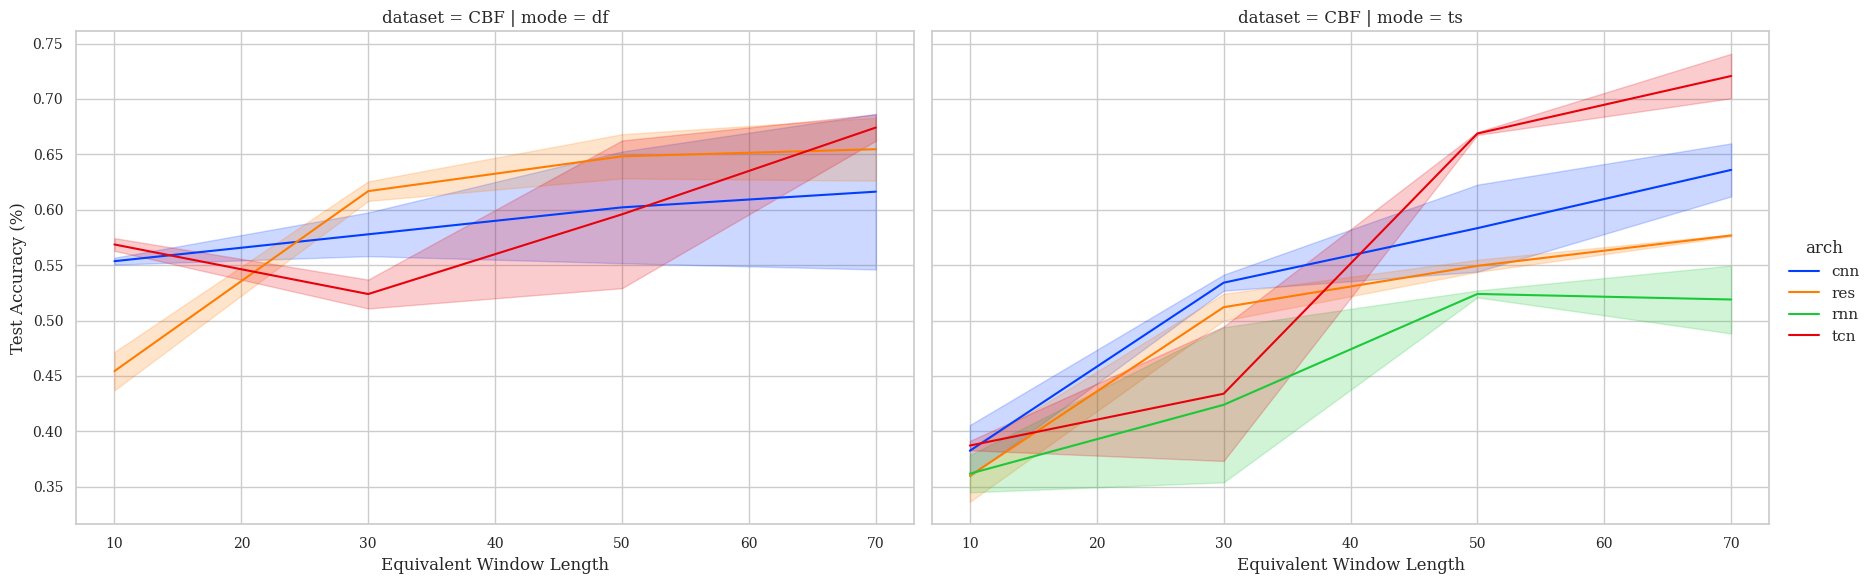

In [99]:
# Generate a plot
data["Method"] =  data["arch"] + "_" + data["mode"]
data.sort_values(["Method"], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')

g = sns.relplot(data=data, x="eq_wdw_length", y="test_acc", hue='arch', kind="line", palette="bright", col="mode", row="dataset",
                height=6, aspect=1.5, legend=True, markers="True", facet_kws={"despine": False})

g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Equivalent Window Length");

g.savefig("figures/time_dilation.pdf", bbox_inches='tight')

# Section 5.2: Pattern Stride Effects

In [100]:
data = df[df["pretrain_mode"] == False].copy()

data = data[data['train_exc_limit'] == 32]
data = data[data["window_time_stride"] == 7]
data = data[data["pretrained"] == False]

data = data[data["dataset"] == "CBF"]

In [101]:
# Generate a table
data.groupby(["dataset", "mode", "arch", "window_patt_stride"])[cols].mean()

test_acc   test_f1  test_auroc  \
dataset mode arch window_patt_stride                                   
CBF     df   cnn  1                   0.616319  0.616319    0.377772   
                  2                   0.604254  0.604254    0.382241   
                  3                   0.531024  0.531024    0.364381   
                  5                   0.505641  0.505641    0.354080   
             res  1                   0.654648  0.654648    0.390309   
                  2                   0.672510  0.672510    0.384691   
                  3                   0.638842  0.638842    0.376062   
                  5                   0.622371  0.622371    0.377116   
             tcn  1                   0.674174  0.674174    0.388307   

                                       val_acc    val_f1  val_auroc  
dataset mode arch window_patt_stride                                 
CBF     df   cnn  1                   0.611410  0.611410   0.330865  
                  2                   0.599674  0.599674   0.343654  
                  3                   0.542217  0.542217   0.351992  
                  5                   0.500570  0.500570   0.343373  
             res  1                   0.670212  0.670212   0.357884  
                  2                   0.660269  0.660269   0.329455  
                  3                   0.647107  0.647107   0.340243  
                  5                   0.633700  0.633700   0.345781  
             tcn  1                   0.643358  0.643358   0.326972

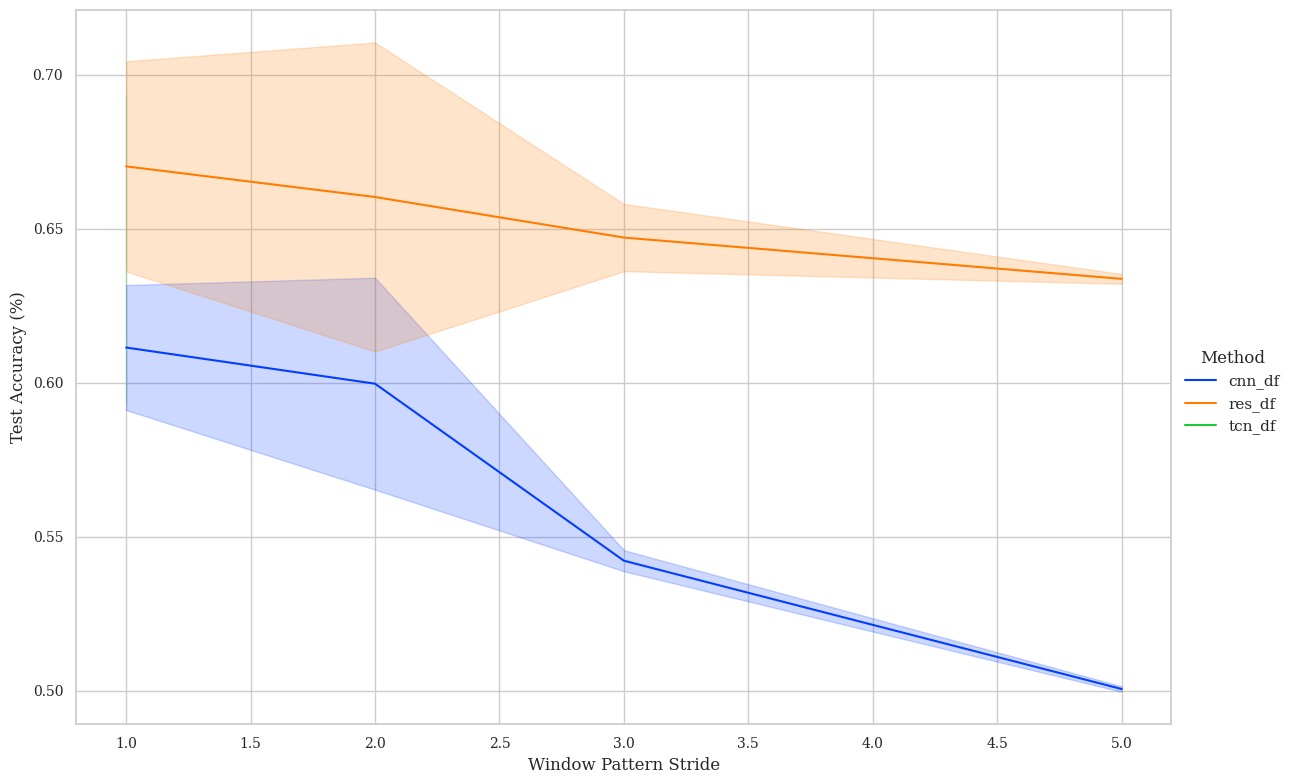

In [102]:
# Generate a plot
data["Method"] =  data["arch"] + "_" + data["mode"]
data.sort_values(["Method"], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')

g = sns.relplot(data=data, x="window_patt_stride", y="val_acc", hue='Method', kind="line", palette="bright",
                height=8, aspect=1.5, legend=True, markers="True", facet_kws={"despine": False})

g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Window Pattern Stride");

g.savefig("figures/pattern_stride_acc.pdf", bbox_inches='tight')

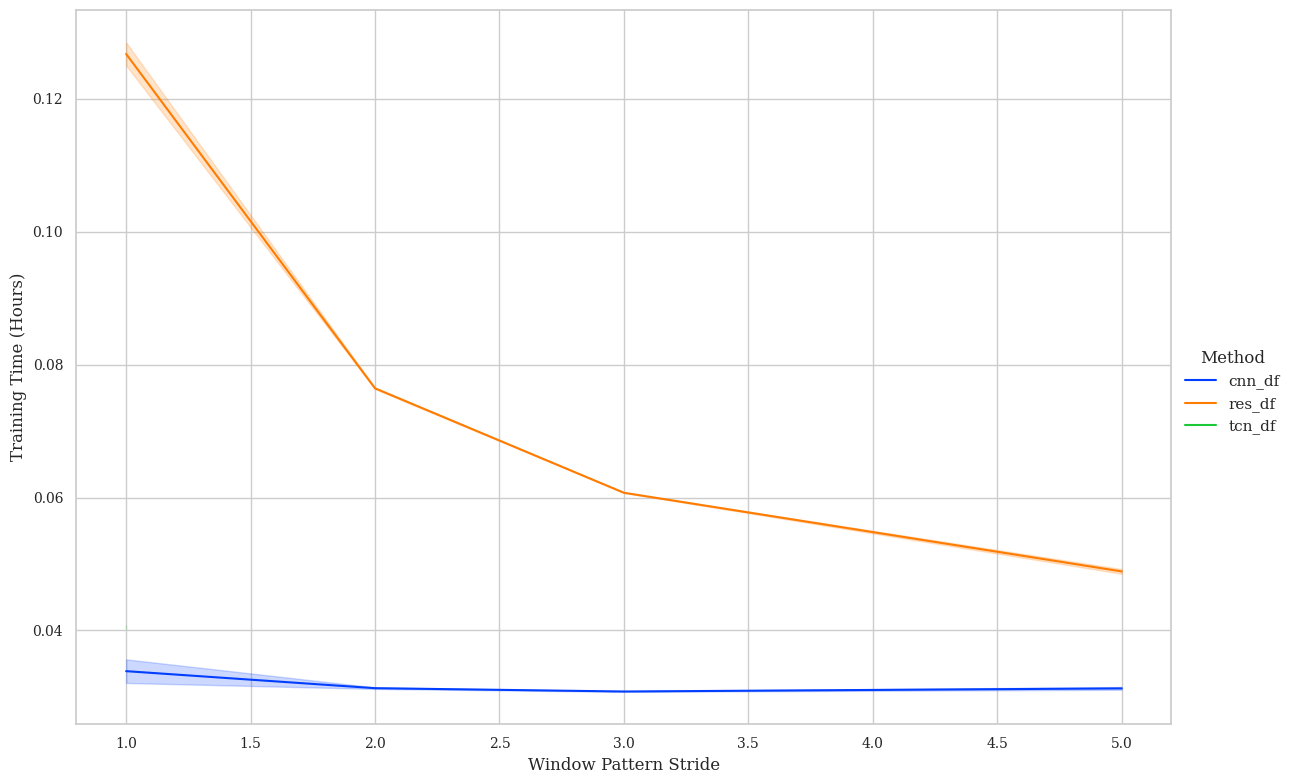

In [103]:
# Generate a plot

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')

data["Time"] = data["time_train"]/60/60

g = sns.relplot(data=data, x="window_patt_stride", y='Time', hue='Method', kind="line", palette="bright",
                height=8, aspect=1.5, legend=True, markers="True", facet_kws={"despine": False})

g.set_ylabels("Training Time (Hours)")
g.set_xlabels("Window Pattern Stride");

g.savefig("figures/pattern_stride_time.pdf", bbox_inches='tight')

# Section 5.3: Self-Supervised Pretrain Effects

In [107]:
data = df[df["pretrain_mode"] == False].copy()

data = data[data["window_time_stride"] == 7]
data = data[data["window_patt_stride"] == 1]

data = data[data["dataset"] == "CBF"]
data = data[data["arch"].isin(["cnn", "tcn"])]

In [108]:
data.groupby(["dataset", "mode", "arch", "pretrained", "stride_series", 'train_exc_limit'])[cols].mean()

test_acc  \
dataset mode arch pretrained stride_series train_exc_limit             
CBF     df   cnn  False      False         4.0              0.418821   
                                           8.0              0.450192   
                                           16.0             0.519710   
                                           32.0             0.616319   
                  True       False         4.0              0.519019   
                                           8.0              0.601866   
                                           16.0             0.673414   
                                           32.0             0.742411   
                             True          4.0              0.513255   
                                           8.0              0.603503   
                                           16.0             0.688370   
                                           32.0             0.754299   
             tcn  False      False         4.0              0.385147   
                                           8.0              0.416264   
                                           16.0             0.497490   
                                           32.0             0.674174   
                  True       False         4.0              0.422773   
                                           8.0              0.540845   
                                           16.0             0.653622   
                                           32.0             0.718105   
                             True          4.0              0.422526   
                                           8.0              0.532168   
                                           16.0             0.668353   
                                           32.0             0.723648   

                                                             test_f1  \
dataset mode arch pretrained stride_series train_exc_limit             
CBF     df   cnn  False      False         4.0              0.418821   
                                           8.0              0.450192   
                                           16.0             0.519710   
                                           32.0             0.616319   
                  True       False         4.0              0.519019   
                                           8.0              0.601866   
                                           16.0             0.673414   
                                           32.0             0.742411   
                             True          4.0              0.513255   
                                           8.0              0.603503   
                                           16.0             0.688370   
                                           32.0             0.754299   
             tcn  False      False         4.0              0.385147   
                                           8.0              0.416264   
                                           16.0             0.497490   
                                           32.0             0.674174   
                  True       False         4.0              0.422773   
                                           8.0              0.540845   
                                           16.0             0.653622   
                                           32.0             0.718105   
                             True          4.0              0.422526   
                                           8.0              0.532168   
                                           16.0             0.668353   
                                           32.0             0.723648   

                                                            test_auroc  \
dataset mode arch pretrained stride_series train_exc_limit               
CBF     df   cnn  False      False         4.0                0.313047   
                                           8.0                0.302592   
                  

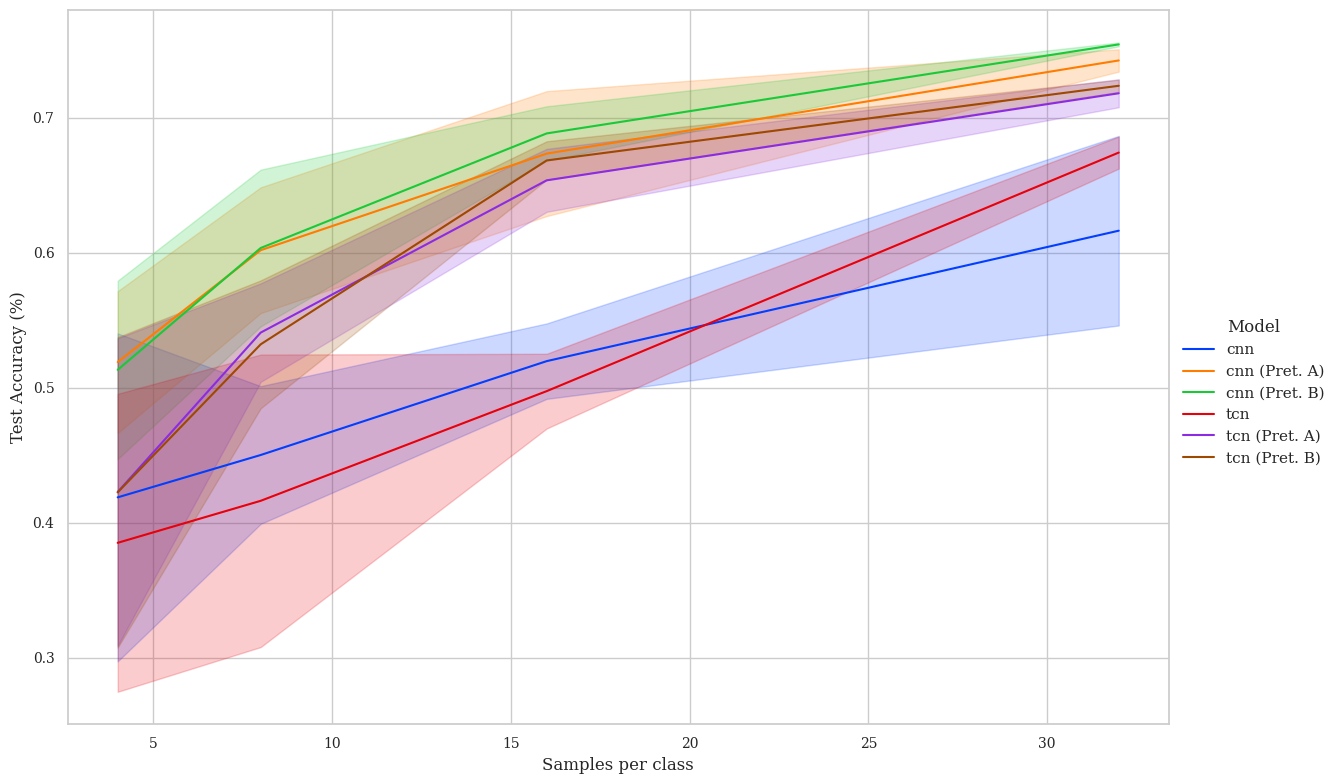

In [109]:
# Generate a plot
data["Model"] = data["arch"] + " " + data["pretrained"].replace({True: "(Pret. ", False: ""}) + data["stride_series"].replace({True: "B)", False: "A)"})
data["Model"].replace({"cnn A)": "cnn", "res A)": "res", "tcn A)": "tcn"}, inplace=True)
data.sort_values(['Model'], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')

g = sns.relplot(data=data, x="train_exc_limit", y="test_acc", hue='Model', kind="line", palette="bright",
                height=8, aspect=1.5, legend=True, facet_kws={"despine": False})

g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Samples per class");

g.savefig("figures/pretrain.pdf", bbox_inches='tight')